In [1]:
import numpy as np
import pandas as pd

# Creating dataset.

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df,df1],ignore_index=True)

df = df.sample(40)

In [2]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [6]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))

fig.show()

In [15]:
X = df.iloc[:,0:3]
y = df.iloc[:,3:4]

In [17]:
# Step1 - Mean centric data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [18]:
X_trf = sc.fit_transform(X)

In [21]:
# Find covariance matrix
cov_matrix = np.cov([X.iloc[:,0],X.iloc[:,1],X.iloc[:,2]])
print("Covariance Matrix:\n",cov_matrix)

Covariance Matrix:
 [[1.34076734 0.24528825 0.10420627]
 [0.24528825 1.12566959 0.23643388]
 [0.10420627 0.23643388 1.327287  ]]


In [22]:
eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)

In [23]:
eigenvalues

array([1.65691289, 1.22963722, 0.90717381])

In [24]:
eigenvectors

array([[-0.61002583, -0.69239396,  0.3853039 ],
       [-0.53982115,  0.00718615, -0.84174906],
       [-0.58005311,  0.72148387,  0.37815264]])

In [30]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        proj = self.axes.get_proj()
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, proj)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        proj = self.axes.get_proj()
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, proj)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


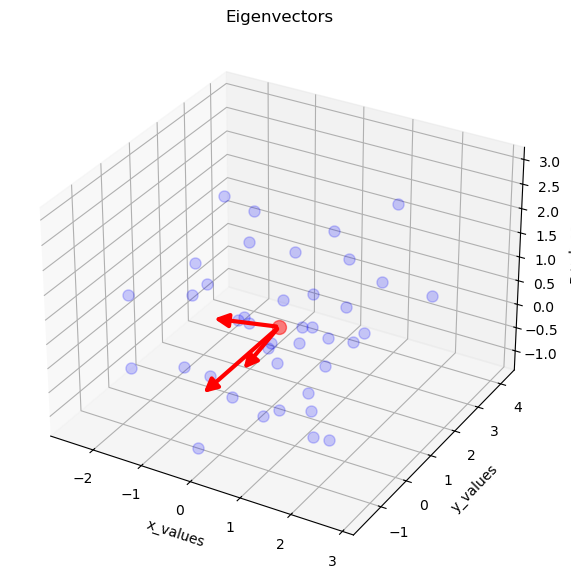

In [31]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
for v in eigenvectors.T:
    a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [32]:
# Above is the representation of 3 eigenvectors in the 3D Space
# To perform dimentionality reduction into 2D, we will select top 2 vectors

In [33]:
# Principal Components
pc = eigenvectors[0:2]
pc

array([[-0.61002583, -0.69239396,  0.3853039 ],
       [-0.53982115,  0.00718615, -0.84174906]])

In [ ]:
tranformed_df = np.dot(X,pc.T) # T refers to transpose of pc matrix above.

new_df = pd.DataFrame(tranformed_df,columns=['PC1','PC2'])
new_df['Target'] = df['target'].values

In [36]:
new_df.head()

,PC1,PC2,Target
0,0.502355,1.303153,1
1,0.778695,-1.132295,0
2,-0.569075,-0.164066,1
3,-1.083293,-0.494640,1
4,1.660680,0.843708,1


In [ ]:
new_df['Target'] = new_df['Target'].astype('str')
fig = px.scatter(x=new_df['PC1'],y=new_df['PC2'],color=new_df['Target'],color_discrete_sequence=px.colors.qualitative.G10)

fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.show()

In [ ]:
# 3D Data converted into 2D